# 🚀 AI学习快速入门 - 5分钟体验机器学习的魅力

**欢迎来到AI的世界！**

这个Notebook将带你在5分钟内体验完整的机器学习流程：
1. 加载数据
2. 训练模型
3. 做出预测
4. 看到结果

准备好了吗？让我们开始吧！ 🎯

## 步骤1: 导入工具库

就像做菜前准备食材和工具一样，我们先导入需要的Python库。

In [1]:
# 数据处理工具
import numpy as np
import pandas as pd

# 可视化工具
import matplotlib.pyplot as plt
import seaborn as sns

# 机器学习工具
from sklearn.datasets import load_iris  # 经典鸢尾花数据集
from sklearn.model_selection import train_test_split  # 数据集划分：训练集和测试集
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 评估指标，混淆矩阵，分类报告

# 设置随机种子（让结果可复现）
np.random.seed(42)

# 设置可视化样式
plt.style.use('seaborn-v0_8-darkgrid')  # 使用Seaborn的暗色网格风格
sns.set_palette('husl')  # 设置Seaborn调色板

print("✅ 所有工具准备就绪！")
print(f"📦 NumPy版本: {np.__version__}")
print(f"📦 Pandas版本: {pd.__version__}")
print("\n🎉 让我们开始机器学习之旅吧！")

✅ 所有工具准备就绪！
📦 NumPy版本: 1.26.4
📦 Pandas版本: 2.3.3

🎉 让我们开始机器学习之旅吧！


## 步骤2: 加载数据 - 认识鸢尾花数据集

**鸢尾花数据集 (Iris Dataset)** 是机器学习中最著名的数据集之一。

- 📊 **150朵鸢尾花**的测量数据
- 🌸 **3个品种**: Setosa（山鸢尾）、Versicolor（杂色鸢尾）、Virginica（维吉尼亚鸢尾）
- 📏 **4个特征**: 花萼长度、花萼宽度、花瓣长度、花瓣宽度
- 🎯 **任务**: 根据花的测量数据，预测它是哪个品种

In [20]:
# 加载数据
iris = load_iris()

# 转换为DataFrame（更容易查看）
df = pd.DataFrame(
    data=iris.data,  # 特征数据
    columns=iris.feature_names  # 特征名称
)
df['species'] = iris.target  # 添加目标变量
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})  # 添加物种名称列

print("✅ 数据加载成功！")
print(f"📊 数据形状: {df.shape[0]}行 × {df.shape[1]}列")
print(f"\n前5行数据:")
df.head()

✅ 数据加载成功！
📊 数据形状: 150行 × 6列

前5行数据:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


## 步骤3: 数据可视化 - 看看数据长什么样

"一图胜千言"，让我们用图表来理解数据。

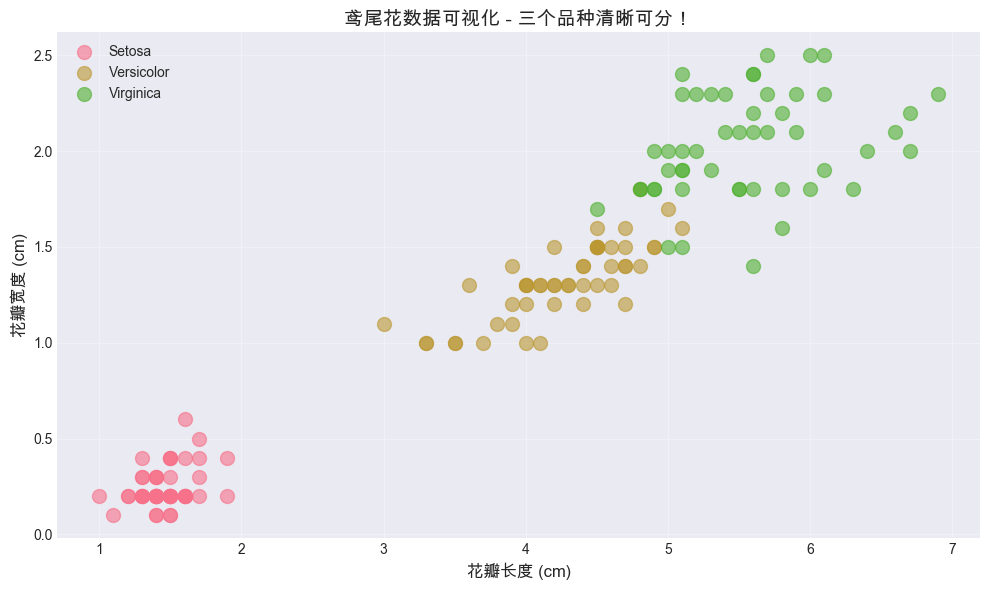


💡 观察: 三个品种在图中有明显的区域分布！
这就是为什么机器学习能够识别它们的原因。


In [ ]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
# 绘制散点图：花瓣长度 vs 花瓣宽度
plt.figure(figsize=(10, 6))
for species in df['species_name'].unique():  # 遍历每个物种
    subset = df[df['species_name'] == species]  # 筛选出当前物种的数据
    plt.scatter(
        subset['petal length (cm)'],  # 花瓣长度
        subset['petal width (cm)'],  # 花瓣宽度
        label=species,  # 图例标签
        s=100,  # 点的大小
        alpha=0.6  # 透明度
    )

plt.xlabel('花瓣长度 (cm)', fontsize=12)  # X轴标签
plt.ylabel('花瓣宽度 (cm)', fontsize=12)  # Y轴标签
plt.title('鸢尾花数据可视化 - 三个品种清晰可分！', fontsize=14, fontweight='bold')  # 图表标题
plt.legend(fontsize=10)  # 显示图例
plt.grid(True, alpha=0.3)  # 添加网格
plt.tight_layout()  # 调整布局
plt.show()

print("\n💡 观察: 三个品种在图中有明显的区域分布！")
print("这就是为什么机器学习能够识别它们的原因。")

## 步骤4: 准备训练数据

把数据分成两部分：
- **训练集 (80%)**: 让模型学习
- **测试集 (20%)**: 验证模型是否真的学会了

In [30]:
# 特征（X）和标签（y）
X = iris.data
y = iris.target

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20%用于测试
    random_state=42,  # 随机种子，让结果可复现
    stratify=y  # 保持各类别比例
)
# print(f"X_train: {X_train}")
# print(f"X_test: {X_test}")
# print(f"y_train: {y_train}")
# print(f"y_test: {y_test}")


# print(f"X_train.shape: {X_train.shape}")  # X_train.shape: (120, 4)
print("✅ 数据分割完成！")
print(f"📚 训练集: {X_train.shape[0]}个样本")
print(f"📝 测试集: {X_test.shape[0]}个样本")
print(f"\n🎯 目标: 训练一个模型，让它学会识别鸢尾花品种！")

✅ 数据分割完成！
📚 训练集: 120个样本
📝 测试集: 30个样本

🎯 目标: 训练一个模型，让它学会识别鸢尾花品种！


## 步骤5: 训练模型 - 让AI学习！

我们使用 **随机森林 (Random Forest)** 算法。

**什么是随机森林？**
- 想象100个专家（决策树）一起讨论
- 每个专家给出自己的判断
- 最后投票决定结果
- 群体智慧比单个专家更准确！

In [ ]:
# 创建随机森林模型
model = RandomForestClassifier(
    n_estimators=100,  # 100棵决策树
    max_depth=5,  # 每棵树最多5层深
    random_state=42  # 随机种子
)

print("🌳 创建随机森林模型 (100棵决策树)...")
print("📖 开始训练...")

# 训练模型（这一行就是AI在"学习"！）
model.fit(X_train, y_train)

print("\n✅ 训练完成！模型已经学会识别鸢尾花了！")
print("🎓 让我们看看它学得怎么样...")

🌳 创建随机森林模型 (100棵决策树)...
📖 开始训练...

✅ 训练完成！模型已经学会识别鸢尾花了！
🎓 让我们看看它学得怎么样...


## 步骤6: 测试模型 - AI考试时间！

让模型预测测试集的30朵花，看看它能答对多少。

In [6]:
# 让模型做预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print("🎯 预测完成！让我们看看结果...\n")
print("=" * 50)
print(f"🏆 准确率: {accuracy * 100:.2f}%")
print("=" * 50)

if accuracy >= 0.95:
    print("\n🌟 太棒了！模型几乎完美！")
elif accuracy >= 0.90:
    print("\n👍 很好！模型表现优秀！")
else:
    print("\n💪 不错！还有进步空间。")

print(f"\n📊 详细报告:")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=iris.target_names
))

🎯 预测完成！让我们看看结果...

🏆 准确率: 93.33%

👍 很好！模型表现优秀！

📊 详细报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## 步骤7: 混淆矩阵 - 看看模型在哪里出错

**混淆矩阵 (Confusion Matrix)** 就像考试的错题本，告诉我们：
- 对角线：预测正确的数量
- 非对角线：预测错误的数量

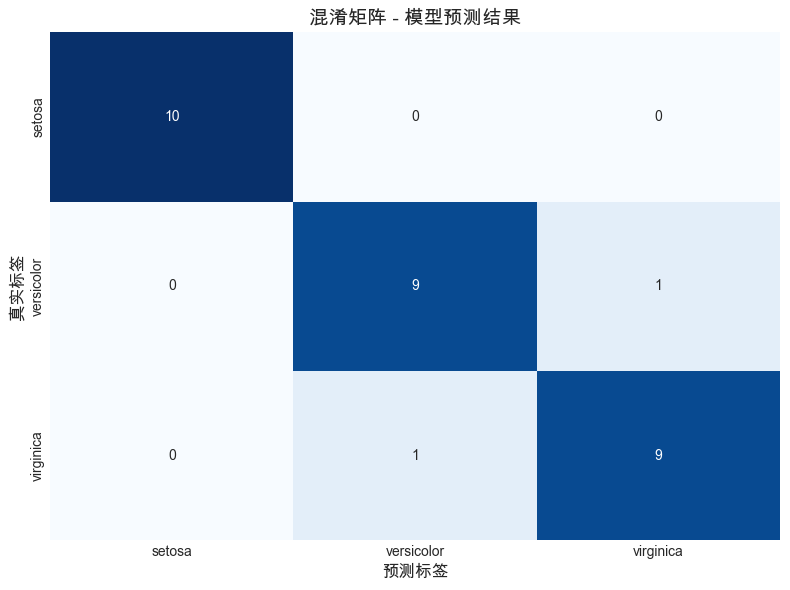


💡 解读:
- 对角线上的数字：预测正确的数量
- 对角线外的数字：预测错误的数量
- 颜色越深表示数量越多


In [ ]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    cbar=False
)
plt.xlabel('预测标签', fontsize=12)
plt.ylabel('真实标签', fontsize=12)
plt.title('混淆矩阵 - 模型预测结果', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 解读:")
print("- 对角线上的数字：预测正确的数量")
print("- 对角线外的数字：预测错误的数量")
print("- 颜色越深表示数量越多")

## 步骤8: 特征重要性 - 哪些特征最重要？

模型会告诉我们，哪些特征对预测最有帮助。

/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_6353/2521257399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


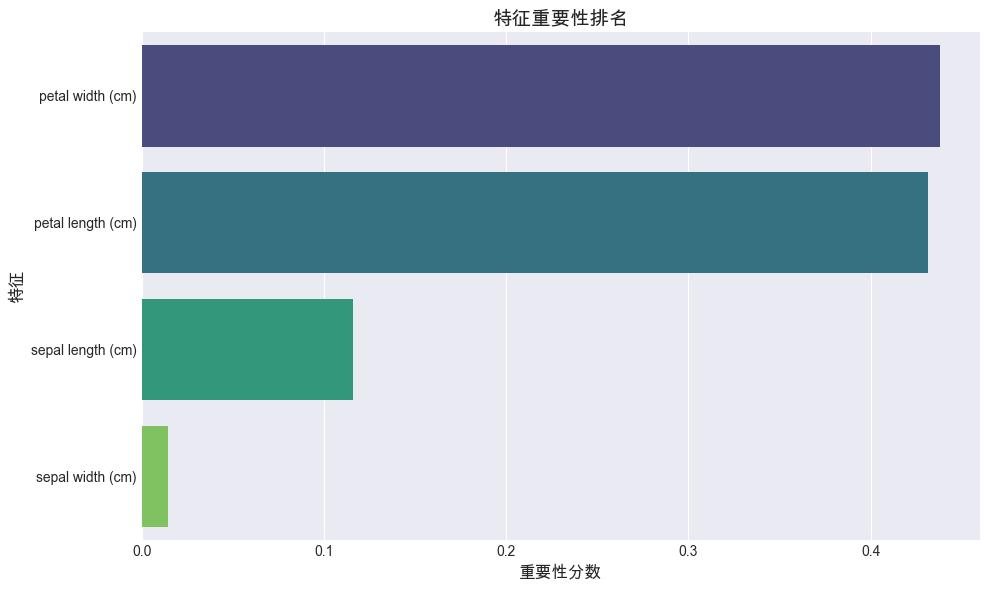


💡 发现:
最重要的特征: petal width (cm)

这意味着花瓣的尺寸比花萼更能区分不同品种的鸢尾花！


In [8]:
# 获取特征重要性
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance,
    x='importance',
    y='feature',
    palette='viridis'
)
plt.xlabel('重要性分数', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.title('特征重要性排名', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 发现:")
print(f"最重要的特征: {feature_importance.iloc[0]['feature']}")
print("\n这意味着花瓣的尺寸比花萼更能区分不同品种的鸢尾花！")

## 🎉 恭喜！你完成了第一个机器学习项目！

### 你学到了什么？

✅ **数据处理**: 用Pandas加载和探索数据  
✅ **数据可视化**: 用Matplotlib/Seaborn画图  
✅ **模型训练**: 用Random Forest训练分类器  
✅ **模型评估**: 计算准确率、混淆矩阵  
✅ **模型解释**: 分析特征重要性  

### 这个流程就是机器学习的核心！

```
数据 → 训练 → 预测 → 评估 → 改进
```

### 下一步学什么？

1. **深入理论** 📚
   - 打开 `docs/glossary.md` 查看术语表
   - 阅读 `docs/learning-path.md` 了解完整学习路线

2. **做真实项目** 🚀
   - 项目1: 朝阳医院数据分析
   - 项目2: 服装零售数据分析
   - 项目3: 银行营销预测
   - ... 还有14个项目等着你！

3. **探索更多算法** 🔬
   - XGBoost (更强大的集成学习)
   - K-means (无监督聚类)
   - SVM (支持向量机)

### 学习建议 💡

- **边学边查**: 遇到不懂的术语就查 `glossary.md`
- **动手实践**: 每个概念都要亲自跑一遍代码
- **理解原理**: 不只是会用，还要知道为什么
- **循序渐进**: 跟着学习路线一步步来

---

**准备好开始真正的AI学习之旅了吗？** 🚀

打开 `docs/learning-path.md`，开始阶段3的系统学习吧！

**记住**: 每个AI专家都是从这个简单的鸢尾花分类开始的。  
你已经迈出了最重要的第一步！ 🎓✨